In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Final_Table_2.csv')
p_df = pd.read_csv('data/Merged_Table_1.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin_city_name', 'dest_city_name', 'crs_dep_time', 'dep_delay',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'distance', 'Trip_count_PerDay', 'origin_city_condn',
       'dest_city_condn', 'Minutes_to_wheels_off', 'Minutes_from_wheels_on',
       'day', 'day_Week'],
      dtype='object')

In [4]:
p_df.columns

Index(['Unnamed: 0', 'index', 'fl_date', 'mkt_unique_carrier',
       'mkt_carrier_fl_num', 'origin_city_name', 'dest_city_name',
       'crs_dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'Trip_count_PerDay', 'Trip_count_Permonth',
       'Trip_count_PerYear', 'origin_city_condn', 'dest_city_condn'],
      dtype='object')

In [5]:
cols = ['distance','air_time']

In [6]:
df_pred = p_df[cols]
"""
distance predict air_time, 
"""

'\ndistance predict air_time, \n'

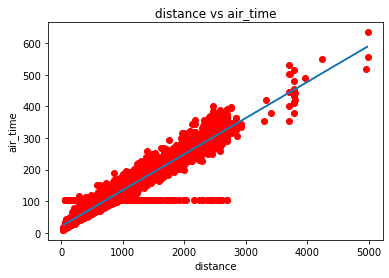

In [7]:
#plotting Liear regression line to show liear relationship between distance and 'actual_elapsed_time'
x=df_pred['distance']
y = df_pred['air_time']

m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color = "red")
plt.plot(x, m*x+b)
plt.title("distance vs air_time")
plt.xlabel("distance")
plt.ylabel("air_time")
plt.show()

In [14]:
#extract X,y for train and testing data
X = df_pred.drop(columns = ['air_time'])
y = df_pred['air_time']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20, random_state=42)

In [15]:
X.columns

Index(['distance'], dtype='object')

In [9]:
L_airtime = LinearRegression()
L_airtime.fit(X_train, y_train)
pred_art = L_airtime.predict(X_test)

In [10]:
r2 = L_airtime.score(X_test, y_test)
print("-------Linear Regression-------")
print("Coefficient of determination: {}".format(r2))

-------Linear Regression-------
Coefficient of determination: 0.9496587990623073


In [11]:
# Fit the model on training set
import pickle
model = LinearRegression()
model.fit(X_train, y_train)
# save the model to disk, using 'distance' to predict
filename = 'air_time_pred_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

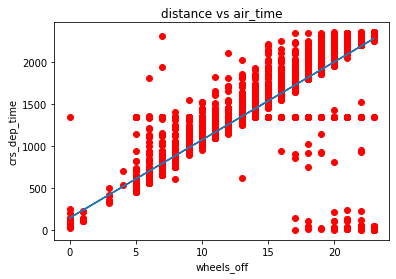

In [12]:
#plotting Liear regression line to show liear relationship between distance and 'actual_elapsed_time'
x=p_df['crs_dep_time']
y = p_df['wheels_off']

m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color = "red")
plt.plot(x, m*x+b)
plt.title("distance vs air_time")
plt.xlabel("wheels_off")
plt.ylabel("crs_dep_time")
plt.show()

In [16]:
#extract X,y for train and testing data
X = p_df[['crs_dep_time']]
y = p_df['wheels_off']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20, random_state=42)

In [31]:
# setting the base estimators as the base models and final estimator with a linear regression with 5 cross folds.
base_models = [
    ('Linear Regression',LinearRegression()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)

# Base Model 
for name, model in base_models:
    start_time = time.time()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    end_time = time.time()
    
    r2 = model.score(X_test, y_test)
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
start_time = time.time()

# Stacked Model 
start_time = time.time()
stacked.fit(X, y)    
stacked_prediction = stacked.predict(X_test)
end_time = time.time()
stacked_r2 = stacked.score(X_test, y_test)
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")

#stacked model using, Liear, SVR, Random Forest, and final decision: Liear Regression
#able to acchieve 0.02% higher score compare to Liear Model

#but its worth to mention that, cost-realatings will increase significantly, as time performance increases from 0.006s to 28.47
#therefore I will choose Liear to predict actual_elapsed_time feature

-------Linear Regression-------
Coefficient of determination: 0.8361770239547383
Computation Time: 0.004004955291748047
----------------------------------

-------SVR-------
Coefficient of determination: 0.8358795681245375
Computation Time: 3.1798782348632812
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.8485001053107354
Computation Time: 0.12691998481750488
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.8506011752297893
Computation Time: 21.385077953338623
----------------------------------


In [32]:
# Fit the model on training set
import pickle
model = LinearRegression()
model.fit(X_train, y_train)
# save the model to disk, using 'crs_dep_time' to predict
filename = 'pred_wheels_off_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [12]:
#load the model from pickle
import pickle
wheels_off = pickle.load(open('features prediction/pred_wheels_off_model.sav', 'rb'))
pred = wheels_off.predict(X_test)

NameError: name 'X_test' is not defined

In [30]:
pred.astype(int)

array([ 795, 1632,  795, ...,  795, 1446,  888])

In [31]:
from function_helpers import TimeFormatted

In [48]:
hours = "{0:04d}".format(int(795))

In [50]:
hours, mins, hour

('0795', 35, 8)

In [51]:
mins = int(hours[2:4]) - 60
hour = int(hours[0:2]) + 1
str(hour)+str(mins)

'835'

In [10]:
from function_helpers import to_int_hour

In [11]:
X_test['wheels_off'] = pred.astype(int)

NameError: name 'pred' is not defined

In [57]:
X_test['wheels_off'].apply(to_int_hour)

169      835
9354    1632
3013     835
1475    1021
7420    0609
        ... 
1369    1260
740     2004
3461     835
5183    1446
1188     928
Name: wheels_off, Length: 2920, dtype: object